# STAT 201 
## Group 46
### Tsun Li Nicholas Tam, Camila Dall Bello, Leon Zhang


In [1]:
# Imports

# library(cowplot)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(repr)
# library(infer)
library(repr)
# library(datateachr)
library(digest)
library(lubridate)
# library(taxyvr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Introduction
### Background Information
From 2010 to 2013, substantial parts of China have suffered from chronic air pollution. The main pollutants are PM2.5, otherwise known as particulate matter, referring to tiny particles in the air with aerodynamic diameters of 2.5 micrometers (2.5 * 10^(-6) m or 2.5 μm) or less. PM2.5 consists of a complex mixture of solids and aerosols, with particles containing various organic and inorganic compounds. (Inhalable Particulate Matter and Health (PM2.5 and PM10)) 

The presence of high concentrations of PM2.5 in China from 2010 to 2013 has negatively influenced the climate, visibility, and human health, with the most notable case being the Eastern China smog outbreak in December 2013, where PM2.5 levels reached as high as 507 micrograms per cubic metre (507 * 10^(-6) g/m^3). (Con Gen ShanghaiAir, 2013) In an attempt to reduce air pollution, the Chinese government issued a National Air Quality Action Plan, aiming to significantly reduce the concentrations of PM2.5 in China by 2017. (Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E., 2015)

### Dataset and Project Question
For our research project, we have selected datasets of hourly observations of PM2.5 concentration from 1-1-2013 to 12-31-2015. These datasets were retrieved from https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities and converted to CSV files online, containing the PM2.5 data in Beijing, Shanghai, Guangzhou, Chengdu and Shenyang, along with other meteorological data for each city.



<!-- Generalisations based on sample -->
<!-- Differences in locations -->

## Preliminary Results



In [2]:
# Need to merge tables 

beijing_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/BeijingPM20100101_20151231.csv")
# beijing_PM2.5 <- read.csv("https://github.com/Nick-2003/STAT-201-Group-46-Project/raw/main/Data%20Sets/BeijingPM20100101_20151231.csv")
beijing_PM2.5 <- na.omit(beijing_PM2.5) # Need to change to apply only for columns without PM2.5 data
beijing_PM2.5_AV <- beijing_PM2.5 %>% 
    mutate(PM_2.5_AV = (PM_Dongsi + PM_Dongsihuan + PM_Nongzhanguan)/3) %>% 
    select(year, month, day, hour, PM_2.5_AV, DEWP, HUMI, PRES, TEMP, cbwd, Iws)
head(beijing_PM2.5_AV)

shanghai_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShanghaiPM20100101_20151231.csv")
shanghai_PM2.5 <- na.omit(shanghai_PM2.5)
shanghai_PM2.5_AV <- shanghai_PM2.5 %>% 
    mutate(PM_2.5_AV = (PM_Jingan + PM_US.Post + PM_Xuhui)/3) %>% 
    select(year, month, day, hour, PM_2.5_AV, DEWP, HUMI, PRES, TEMP, cbwd, Iws)
head(shanghai_PM2.5_AV)

chengdu_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ChengduPM20100101_20151231.csv")
chengdu_PM2.5 <- na.omit(chengdu_PM2.5)
chengdu_PM2.5_AV <- chengdu_PM2.5 %>% 
    mutate(PM_2.5_AV = (PM_Caotangsi + PM_Shahepu + PM_US.Post)/3) %>% 
    select(year, month, day, hour, PM_2.5_AV, DEWP, HUMI, PRES, TEMP, cbwd, Iws)
head(chengdu_PM2.5_AV)

guangzhou_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/GuangzhouPM20100101_20151231.csv")
guangzhou_PM2.5 <- na.omit(guangzhou_PM2.5)
guangzhou_PM2.5_AV <- guangzhou_PM2.5 %>% 
    mutate(PM_2.5_AV = (PM_City.Station + PM_5th.Middle.School + PM_US.Post)/3) %>% 
    select(year, month, day, hour, PM_2.5_AV, DEWP, HUMI, PRES, TEMP, cbwd, Iws)
head(guangzhou_PM2.5_AV)

shenyang_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShenyangPM20100101_20151231.csv")
shenyang_PM2.5 <- na.omit(shenyang_PM2.5)
shenyang_PM2.5_AV <- shenyang_PM2.5 %>% 
    mutate(PM_2.5_AV = (PM_Taiyuanjie + PM_US.Post + PM_Xiaoheyan)/3) %>% 
    select(year, month, day, hour, PM_2.5_AV, DEWP, HUMI, PRES, TEMP, cbwd, Iws)
head(shenyang_PM2.5_AV)

,year,month,day,hour,PM_2.5_AV,DEWP,HUMI,PRES,TEMP,cbwd,Iws
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
27825,2013,3,5,8,141.0000,-6,59,1019,1,cv,0.89
27826,2013,3,5,9,149.3333,-8,38,1019,5,cv,1.78
27827,2013,3,5,10,147.3333,-8,31,1018,8,cv,2.67
27829,2013,3,5,12,118.0000,-9,23,1017,11,cv,4.45
27830,2013,3,5,13,113.6667,-9,22,1015,12,cv,5.34
27831,2013,3,5,14,173.3333,-10,19,1014,13,cv,7.13


,year,month,day,hour,PM_2.5_AV,DEWP,HUMI,PRES,TEMP,cbwd,Iws
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>
26305,2013,1,1,0,69.00000,-5,69.00,1023,0,SW,60
26306,2013,1,1,1,71.66667,-5,69.00,1023,0,SW,62
26308,2013,1,1,3,75.00000,-4,74.41,1023,0,SW,65
26309,2013,1,1,4,76.33333,-4,80.04,1023,-1,SW,68
26310,2013,1,1,5,77.00000,-4,80.04,1023,-1,SW,70
26311,2013,1,1,6,76.00000,-4,80.04,1023,-1,SW,71


,year,month,day,hour,PM_2.5_AV,DEWP,HUMI,PRES,TEMP,cbwd,Iws
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>
26305,2013,1,1,0,129.3333,-4,64.42,1022,2,cv,1
26306,2013,1,1,1,142.6667,-3,80.19,1022,0,cv,1
26318,2013,1,1,13,157.3333,-9,26.99,1018,9,SW,1
26319,2013,1,1,14,150.6667,-8,27.29,1017,10,SW,2
26320,2013,1,1,15,135.3333,-7,29.48,1015,10,NE,2
26321,2013,1,1,16,118.3333,-7,29.48,1015,10,NE,4


,year,month,day,hour,PM_2.5_AV,DEWP,HUMI,PRES,TEMP,cbwd,Iws
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
26305,2013,1,1,0,81.33333,3.7,91,1014.2,5.0,NW,1.9
26306,2013,1,1,1,86.66667,4.2,88,1014.2,6.0,NW,3.4
26308,2013,1,1,3,58.66667,3.5,76,1013.9,7.5,NW,5.8
26309,2013,1,1,4,63.00000,2.7,69,1013.9,8.0,NW,8.2
26310,2013,1,1,5,44.33333,1.5,62,1014.2,8.4,NW,9.0
26311,2013,1,1,6,41.00000,2.3,66,1014.3,8.3,NW,11.4


,year,month,day,hour,PM_2.5_AV,DEWP,HUMI,PRES,TEMP,cbwd,Iws
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>
28982,2013,4,22,13,131.33333,-1,25.89,1013,19,SW,55
29003,2013,4,23,10,55.66667,-5,26.40,1012,14,SW,17
29009,2013,4,23,16,152.66667,2,50.36,1010,12,SW,56
29025,2013,4,24,8,131.00000,6,87.19,1010,8,SW,33
29033,2013,4,24,16,14.66667,-4,23.50,1006,17,SW,69
29038,2013,4,24,21,16.00000,4,66.27,1008,10,SW,100


In [121]:
#beijing
mean_beijing_2013 <- beijing_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV))%>%  mutate( city = 'Beijing') %>% filter(year == 2013)
mean_beijing_2015 <- beijing_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV))%>% mutate( city = 'Beijing') %>% filter(year == 2015)

#shanghai
mean_shanghai_2013 <- shanghai_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% summarize(mean = mean(PM_2.5_AV)) %>%
mutate( city = 'Shanghai') %>% filter(year == 2013)
mean_shanghai_2015 <- shanghai_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% summarize(mean = mean(PM_2.5_AV)) %>%
mutate( city = 'Shanghai') %>% filter(year == 2015)

#Chengdu
mean_chengdu_2013 <- chengdu_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV)) %>% mutate( city = 'Chengdu') %>% filter(year == 2013)
mean_chengdu_2015 <- chengdu_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV)) %>% mutate( city = 'Chengdu') %>% filter(year == 2015)

#Guangzhou
mean_guangzhou_2013 <- guangzhou_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV))%>% mutate( city = 'Guangzhou') %>% filter(year == 2013)
mean_guangzhou_2015 <- guangzhou_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV))%>% mutate( city = 'Guangzhou') %>% filter(year == 2015)

#Shenyang
mean_shenyang_2013 <- shenyang_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV))%>% mutate( city = 'Shenyang') %>% filter(year == 2013)
mean_shenyang_2015 <- shenyang_PM2.5_AV %>% filter(!is.na(PM_2.5_AV)) %>% group_by(year) %>% 
summarize(mean = mean(PM_2.5_AV))%>% mutate( city = 'Shenyang') %>% filter(year == 2015)


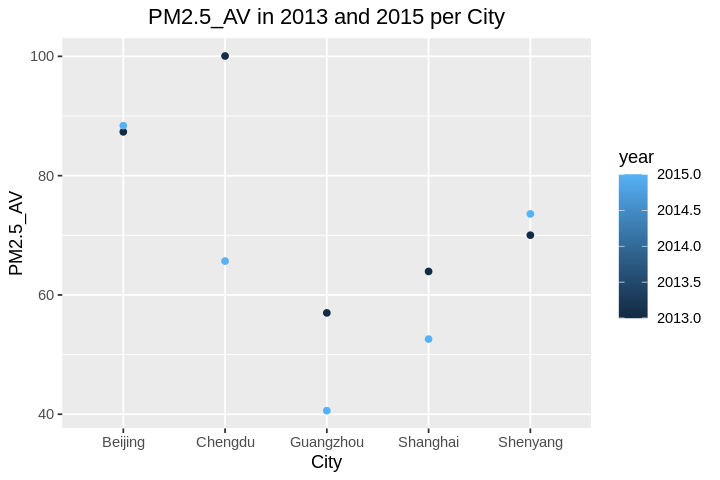

In [88]:
options(repr.plot.width=6, repr.plot.height=4)
cities_plot <- ggplot() +
geom_point(data = mean_beijing_2013, aes(x = city, y = mean, colour = year)) +
geom_point(data = mean_shenyang_2013, aes(x = city, y = mean, colour = year)) +
geom_point(data = mean_shanghai_2013 , aes(x = city, y = mean, colour = year)) +
geom_point(data = mean_guangzhou_2013 , aes(x = city, y = mean, colour = year)) +
geom_point(data = mean_chengdu_2013, aes(x = city, y = mean, colour = year)) +
geom_point(data = mean_beijing_2015, aes(x = city, y = mean, colour = year))  +
geom_point(data = mean_shenyang_2015, aes(x = city, y = mean, colour = year)) +
geom_point(data = mean_shanghai_2015 , aes(x = city, y = mean, colour = year))+
geom_point(data = mean_guangzhou_2015 , aes(x = city, y = mean, colour = year)) +
geom_point(data = mean_chengdu_2015, aes(x = city, y = mean, colour = year)) +
ylab('PM2.5_AV') + xlab('City') + ggtitle('PM2.5_AV in 2013 and 2015 per City') + 
theme(plot.title = element_text(hjust = 0.5))
cities_plot

In [120]:
#Computing differences for each city
complete_data <- rbind(mean_beijing_2013, mean_beijing_2015, mean_shanghai_2013, mean_shanghai_2015, mean_guangzhou_2013,  mean_guangzhou_2015, mean_chengdu_2013, mean_chengdu_2015, mean_shenyang_2013, mean_shenyang_2015)


#differences for each city 
difference_beijing  <-  (filter(complete_data, year == 2013, city == 'Beijing') %>% pull(mean)) - (filter(complete_data, year == 2015, city == 'Beijing') %>% pull(mean))
difference_shanghai  <-  (filter(complete_data, year == 2013, city == 'Shanghai') %>% pull(mean)) - (filter(complete_data, year == 2015, city == 'Shanghai') %>% pull(mean))
difference_guangzhou <- (filter(complete_data, year == 2013, city == 'Guangzhou') %>% pull(mean)) - (filter(complete_data, year == 2015, city == 'Guangzhou') %>% pull(mean))
difference_chengdu <- (filter(complete_data, year == 2013, city == 'Chengdu') %>% pull(mean)) - (filter(complete_data, year == 2015, city == 'Chengdu') %>% pull(mean))
difference_shenyang <- (filter(complete_data, year == 2013, city == 'Shenyang') %>% pull(mean)) - (filter(complete_data, year == 2015, city == 'Shenyang') %>% pull(mean))

print('Difference in Beijing between 2013 and 2015 of PM2.5_AV')
difference_beijing 

print('Difference in Shanghai between 2013 and 2015 of PM2.5_AV')
difference_shanghai

print('Difference in Guangzhou between 2013 and 2015 of PM2.5_AV')
difference_guangzhou

print('Difference in Chengdu between 2013 and 2015 of PM2.5_AV')
difference_chengdu

print('Difference in Shenyang between 2013 and 2015 of PM2.5_AV')
difference_shenyang


[1] "Difference in Beijing between 2013 and 2015 of PM2.5_AV"


[1] -1.041386

[1] "Difference in Shanghai between 2013 and 2015 of PM2.5_AV"


[1] 11.33925

[1] "Difference in Guangzhou between 2013 and 2015 of PM2.5_AV"


[1] 16.39572

[1] "Difference in Chengdu between 2013 and 2015 of PM2.5_AV"


[1] 34.38596

[1] "Difference in Shenyang between 2013 and 2015 of PM2.5_AV"


[1] -3.562402

## Methods: Plan



## References

<!-- - Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220â€“10236 doi:10.1002/2016JD024877 -->
- Liang, X. (2016). PM 2.5 data reliability, consistency, and air quality assessment in five chinese cities CONSISTENCY IN CHINA'S PM 2.5 DATA doi:10.1002/2016JD024877
- “California Air Resources Board.” Inhalable Particulate Matter and Health (PM2.5 and PM10) | California Air Resources Board, https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health#:~:text=For%20PM2.,symptoms%2C%20and%20restricted%20activity%20days.
- Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E. (2015). China's energy crossroads: Forging a new energy and environmental balance. Project Muse. 